In [1]:
#install.packages("gridExtra")
library(tidyverse)
library(ggplot2)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.1.1       <U+221A> purrr   0.3.2  
<U+221A> tibble  2.1.1       <U+221A> dplyr   0.8.0.1
<U+221A> tidyr   0.8.3       <U+221A> stringr 1.4.0  
<U+221A> readr   1.3.1       <U+221A> forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"

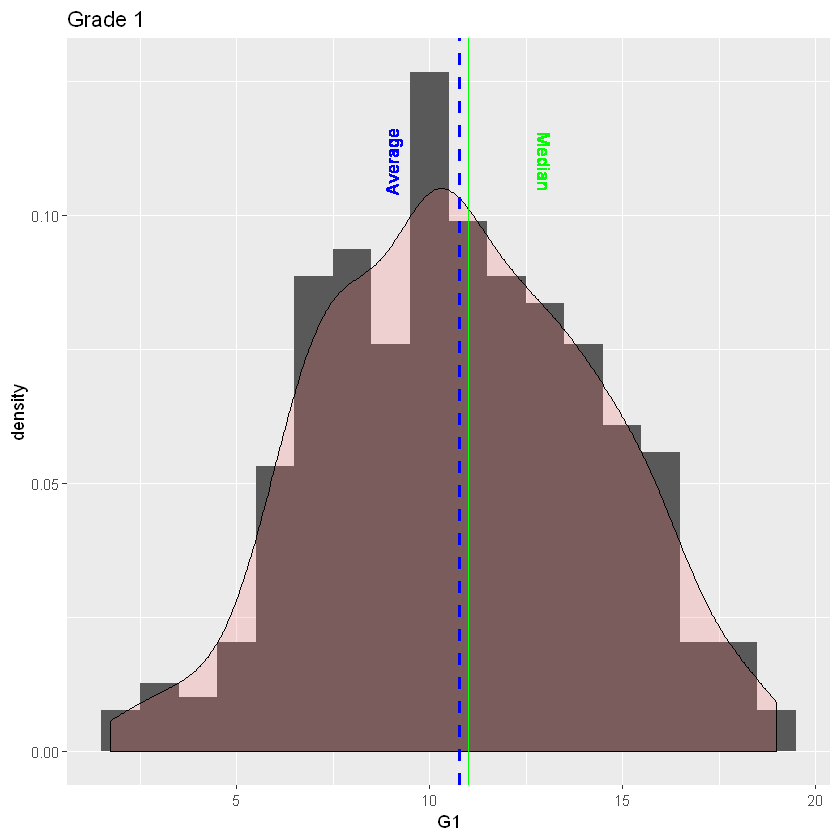

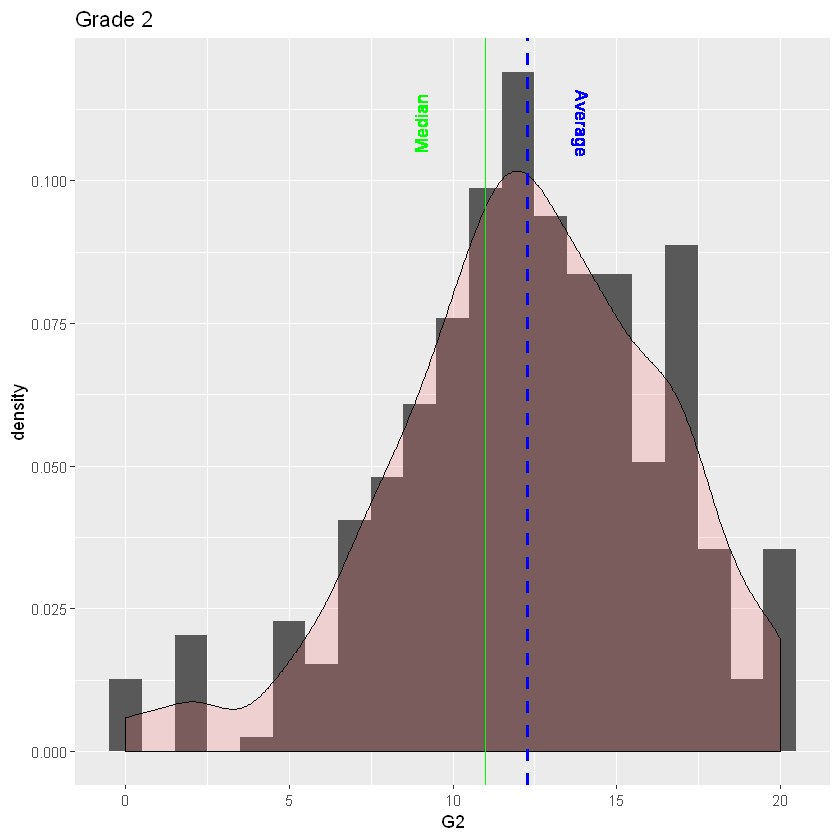

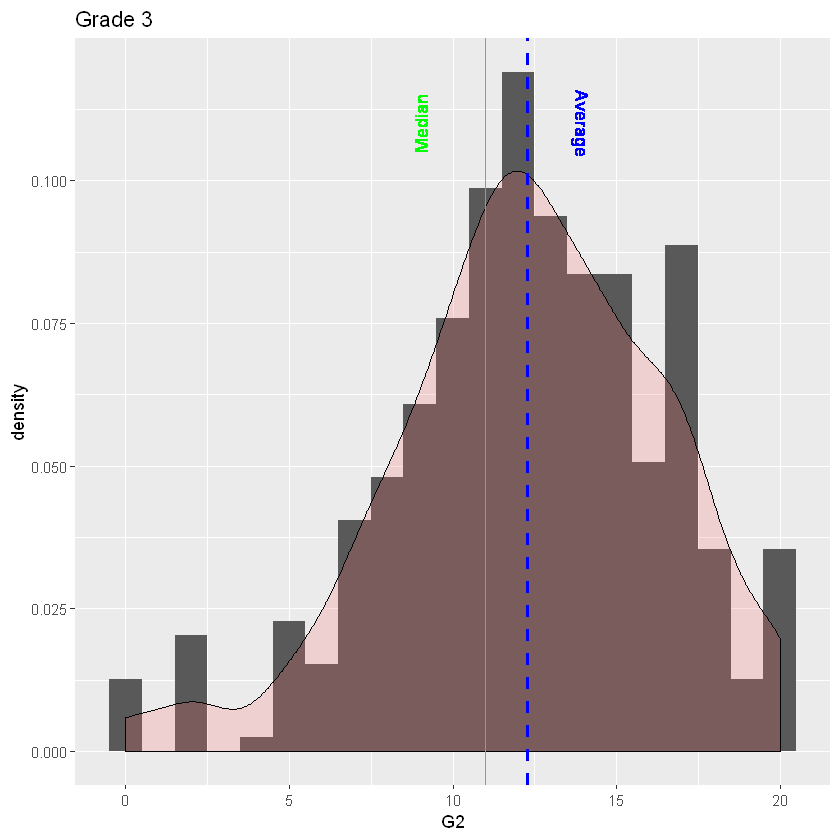

In [2]:
# Part one

student_performance <- read.csv(file = 'StudentsPerformance.csv')

h1 <- ggplot(data = student_performance,aes(x=G1)) + ggtitle("Grade 1") +
       geom_histogram(binwidth=1,aes(y=..density..)) + 
       geom_density(alpha=.2, fill="#FF6666") +
       geom_vline(aes(xintercept=mean(G1)),color="blue", linetype="dashed", size=1) +
       geom_text(aes(x=9, label="Average", y=0.11), colour="blue", angle=90, text=element_text(size=9)) +
       geom_vline(aes(xintercept = median(G1)),colour="green") +
       geom_text(aes(x=13, label="Median", y=0.11), colour="green", angle=270, text=element_text(size=9)) 

h2 <- ggplot(data = student_performance,aes(x=G2)) + ggtitle("Grade 2") +
       geom_histogram(binwidth=1,aes(y=..density..)) + 
       geom_density(alpha=.2, fill="#FF6666") +
       geom_vline(aes(xintercept=mean(G2)),color="blue", linetype="dashed", size=1) +
       geom_text(aes(x=14, label="Average", y=0.11), colour="blue", angle=270, text=element_text(size=9)) +
       geom_vline(aes(xintercept = median(G1)),colour="green") +
       geom_text(aes(x=9, label="Median", y=0.11), colour="green", angle=90, text=element_text(size=9))

h3 <- ggplot(data = student_performance,aes(x=G2)) + ggtitle("Grade 3") +
       geom_histogram(binwidth=1,aes(y=..density..)) + 
       geom_density(alpha=.2, fill="#FF6666") + 
       geom_vline(aes(xintercept=mean(G2)),color="blue", linetype="dashed", size=1) +
       geom_text(aes(x=14, label="Average", y=0.11), colour="blue", angle=270, text=element_text(size=9)) +
       geom_vline(aes(xintercept = median(G1)),colour="green") +
       geom_text(aes(x=9, label="Median", y=0.11), colour="green", angle=90, text=element_text(size=9))

#grid.arrange(h1, h2, h3, ncol=3,nrow = 1)
h1 
h2
h3

Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"`geom_smooth()` using method = 'loess' and formula 'y ~ x'


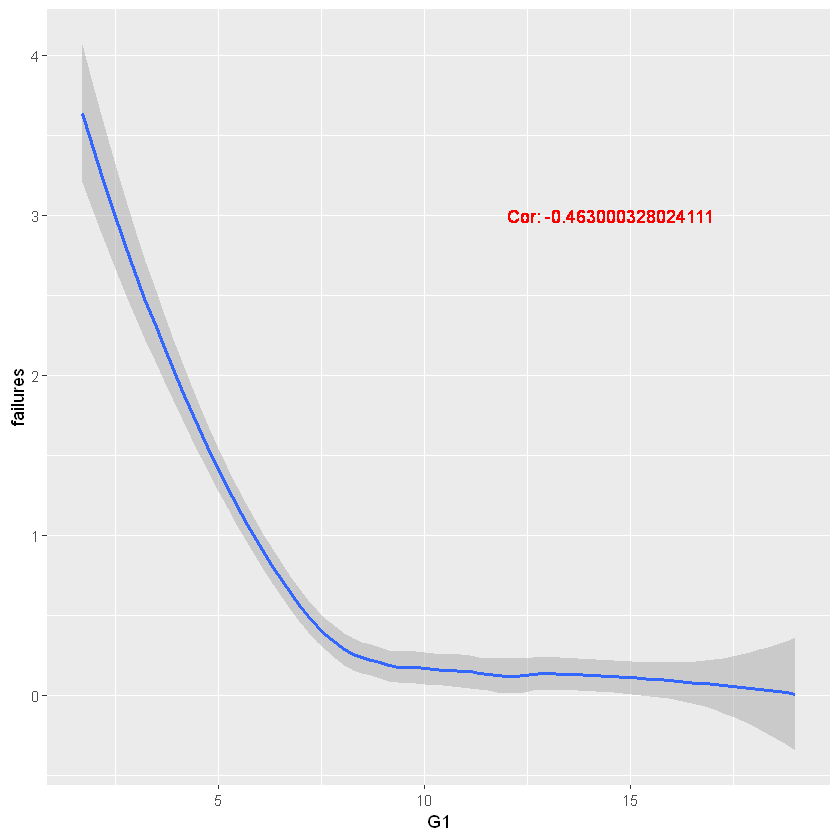

In [3]:
# Part two

#m1 <- ggplot(data = student_performance) + geom_point(mapping = aes(x=failures , y=G1))
m1 <- ggplot(data = student_performance) + geom_smooth(mapping = aes(y=failures , x=G1)) +
      geom_text(aes(x=15, label=cor(student_performance$G1,student_performance$failures), y=3),
                colour="red", angle=0, text=element_text(size=13)) +
      geom_text(aes(x=12.5, label="Cor: ", y=3),
                colour="red", angle=0, text=element_text(size=13))
m1

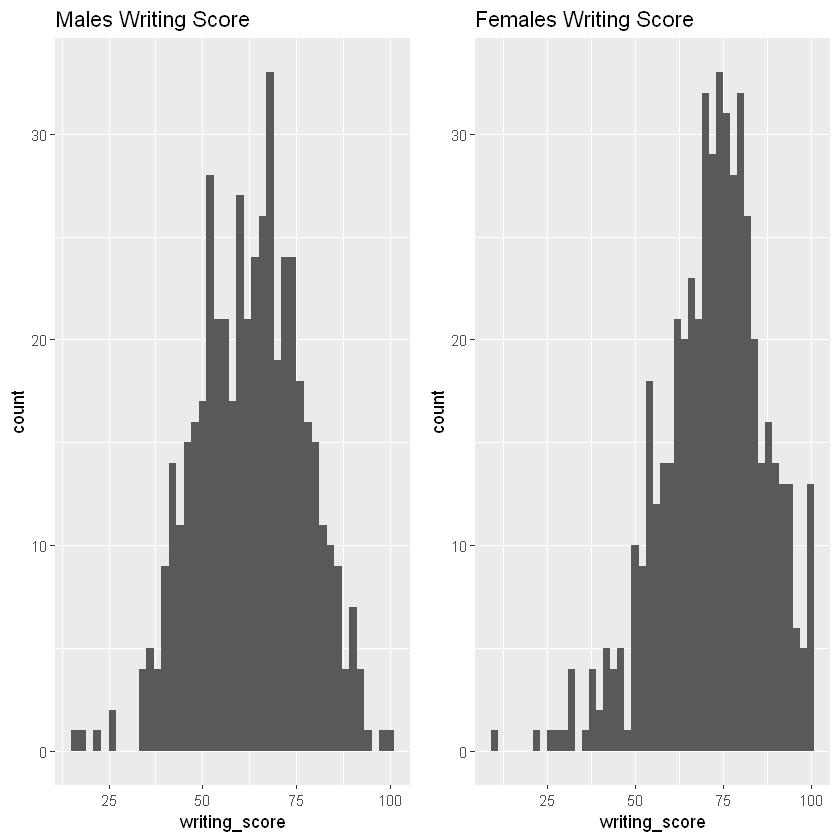

In [4]:
# Part three

grades <- read.csv(file = 'grades.csv')
mg <- filter(grades , gender == 'male')
wg <- filter(grades , gender == 'female')

wsm <- ggplot(data = mg,aes(x=writing_score)) + ggtitle("Males Writing Score") +
       geom_histogram(binwidth=2) 

wsw <- ggplot(data = wg,aes(x=writing_score)) + ggtitle("Females Writing Score") +
       geom_histogram(binwidth=2)

grid.arrange(wsm, wsw, ncol=2,nrow = 1)

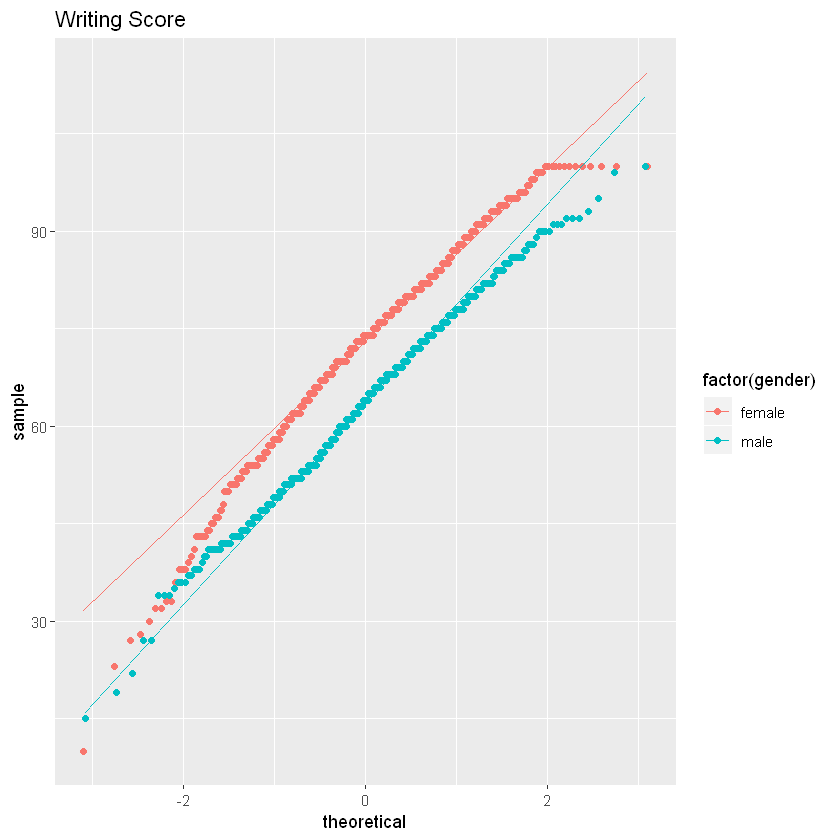

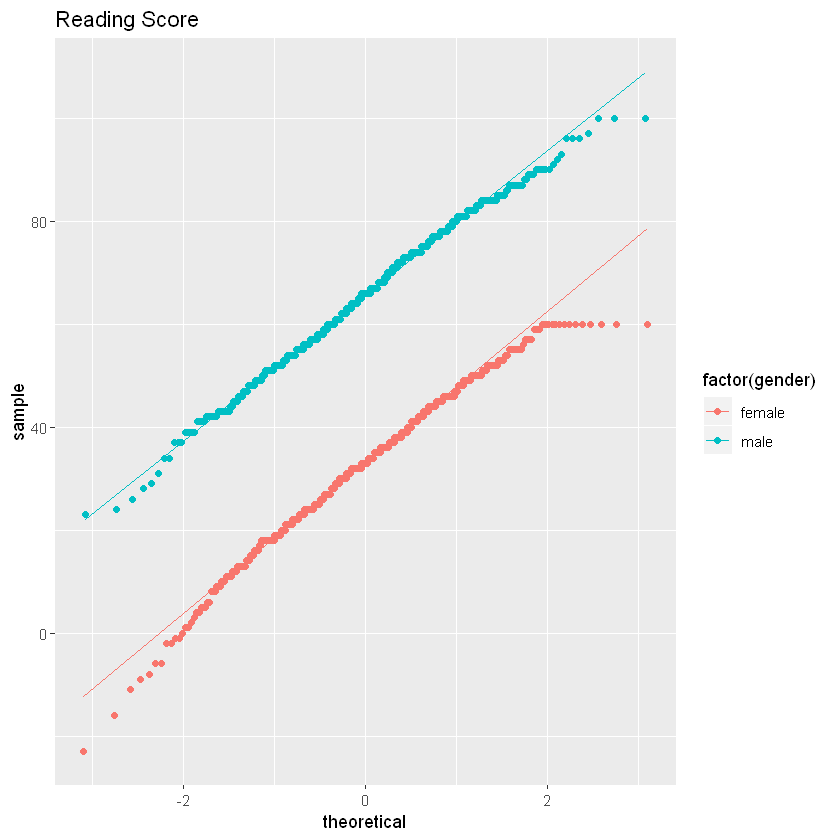

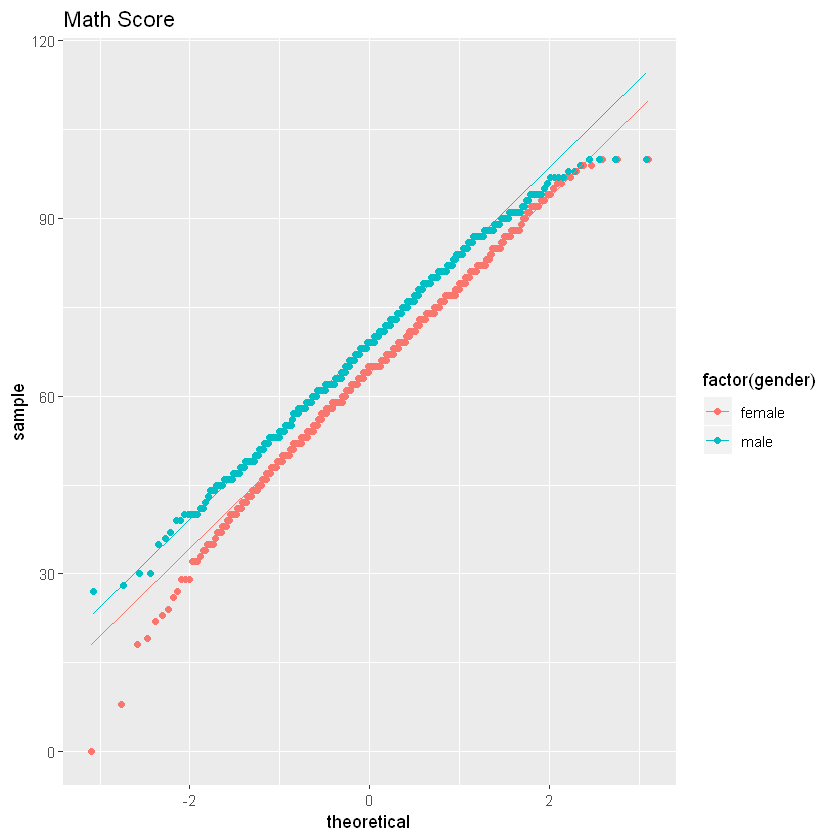

In [5]:
# Part four

wqq <- ggplot(grades , aes(sample = writing_score , colour = factor(gender))) + stat_qq() +
       ggtitle("Writing Score") + stat_qq_line()
rqq <- ggplot(grades , aes(sample = reading_score , colour = factor(gender))) + stat_qq() +
       ggtitle("Reading Score") + stat_qq_line()
mqq <- ggplot(grades , aes(sample = math_score , colour = factor(gender))) + stat_qq() +
       ggtitle("Math Score") + stat_qq_line()

wqq
rqq
mqq
#grid.arrange(wqq, rqq, mqq, ncol=3,nrow = 1)

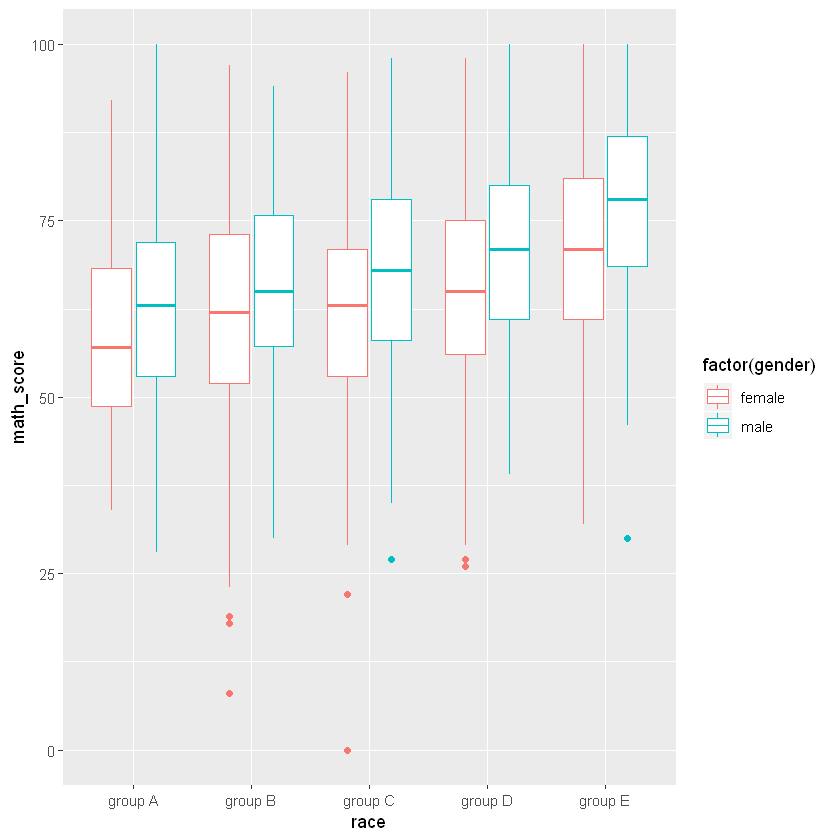

In [6]:
# Part five

bp1 <- ggplot(grades, aes(x=race, y=math_score,colour = factor(gender))) + geom_boxplot()
bp1

Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()


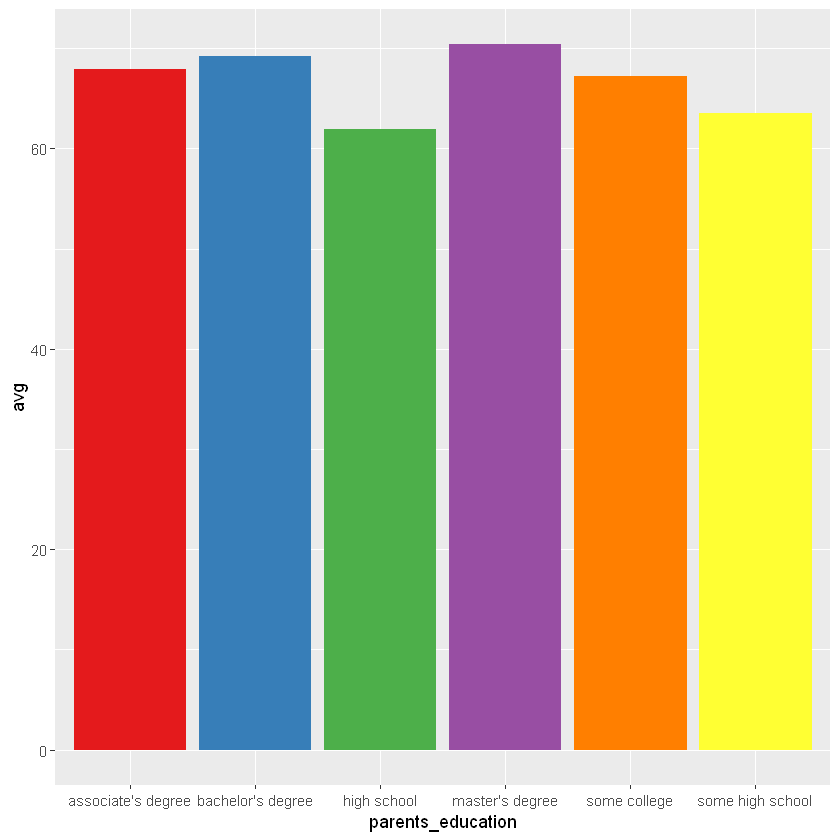

In [7]:
#Part six

grades$avg <- ave(grades$math_score,grades$writing_score,grades$reading_score)
avp <- ggplot(grades, aes(x=parents_education, y=avg,fill=as.factor(parents_education))) +
       geom_bar(position = "dodge",stat = "summary",fun = "mean") + scale_fill_brewer(palette = "Set1") +
       theme(legend.position="none")
avp